In [36]:
import os
import numpy as np
from glob import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


%matplotlib inline

The data we will work with is saved in the folder `zippedData` and we will import them into a dictionary which we call `df`. Each key represents a name of a dataframe and each value of this dictionary is the dataframe. 

In [38]:
csv_files = glob("./cleaned_data/*.csv")
csv_files

cleaned_dict = {}
for filename in csv_files:
    filename_cleaned = (os.path.basename(filename)
                          .replace(".csv", ""))  #cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    cleaned_dict[filename_cleaned] = filename_df
    cleaned_dict[filename_cleaned].reset_index(inplace=True)

title_genres_year
imdb_title_crew_gz
alive_people
Genre-budget-d_gross-w_gross-year
title_genres_year_budgets_studio_rating
imdb_name_basics_gz
imdb_title_akas_gz
imdb_title_ratings_gz
movie_popularity_vote
title_genres_year_budgets
tn_movie_budgets_gz
bom_movie_gross_gz
imdb_title_principals_gz
tmdb_movies_gz
imdb_title_basics_gz
title_genres_year_budgets_studio


In [21]:
cleaned_dict['title_genres_year_budgets_studio_cleaned'].head(2)

,movie,return_ratio,year,tconst,genres,studio
0,Pirates of the Caribbean: On Stranger Tides,2.133774,2011,tt1298650,"Action,Adventure,Fantasy",BV
1,Avengers: Age of Ultron,4.632244,2015,tt2395427,"Action,Adventure,Sci-Fi",BV


# **Merging `DataFrames` and Data Analyzing**

In this section, we will merge some of the previous `DataFrames` to create new ones so that we could perform analysis on them. In the following we will create the following `DataFrames`

\begin{itemize}
\item `title_genres_year`. We make this dataframe by merging `imdb_title_basics_gz` and `imdb_title_akas_gz`.

\item `title_genres_year_budgets`. We make this dataframe by merging `tn_movie_budgets_gz` and `title_genres_year`.

\item `title_genres_year_budgets_studio`. We make this dataframe by merging `title_genres_year_budgets` and `bom_movie_gorss`.

\end{itemize}

After making the above mentioned `DataFrames`, we work on these `DataFrames` and by using aggregating methods and merging approach we create new `DataFrames` and then we analyze them. This part is called \underline{All Directors} which is divided into two parts as bellow:

\begin{itemize}
\item All Directors
\begin{itemize}
\item `all_director_movie_id`. We make this dataframe by merging `imdb_name_basics_gz` and `imdb_title_crew_gz`. 

\item `all_director_budget_genres`. We make this dataframe by merging `title_genres_year_budgets_studio` and `all_director_movie_id`.

\item 



\end{itemize}

\end{itemize}


## Creating a `DataFrame` called \underline{`title_genres_year`} by Merging \underline{`imdb_title_basics_gz`} and \underline{`imdb_title_akas_gz`} 

We realized that in some of the dataframes e.g. `imdb_title_basics_gz` we have two different columns in which a name of a movie is listed. However, there are rows in these two columns that have different names for a same movie. Some of the names are not accurate and have to be changed. In the dataframe `imdb_title_akas_gz` there is a column called "`is_original_title`" with the values `0.0` and `1.0`. This column can be used to check  the name of movie with the id starting with `tt`. Therefore, we are going to merge the dataframes `imdb_title_basics_gz` and `imdb_title_akas_gz` to find the real name of the movies as well as their genres, title, start_year etc. 

In [22]:
dict1 = cleaned_dict["imdb_title_basics_gz_cleaned"]
dict2 = cleaned_dict["imdb_title_akas_gz_cleaned"]
left_l = ["tconst", "original_title"]
right_l =["title_id", "title"]
to_pick = ["tconst", "start_year", "genres", "title"]
cleaned_dict["title_genres_year"] = dict1.merge(dict2, left_on = left_l, right_on = right_l
                               )
cleaned_dict["title_genres_year"] = cleaned_dict["title_genres_year"][to_pick]
cleaned_dict["title_genres_year"].drop_duplicates(inplace = True)
cleaned_dict["title_genres_year"].head()

,tconst,start_year,genres,title
0,tt0063540,2013,"Action,Crime,Drama",Sunghursh
1,tt0066787,2019,"Biography,Drama",Ashad Ka Ek Din
2,tt0069049,2018,Drama,The Other Side of the Wind
3,tt0069204,2018,"Comedy,Drama",Sabse Bada Sukh
4,tt0100275,2017,"Comedy,Drama,Fantasy",La Telenovela Errante


Now we have `tconst`, `genres`, `title` and `year` of the movies. Let's check the percentage of null values in this data frame:

In [24]:
# null_norm(cleaned_dict["title_genres_year"])

So, around $1.2\%$ of the values in the genres are missing. Because genres are categorical data, we may not be able to replace them, so we might need to drop the rows where data are missing. 

In [25]:
cleaned_dict["title_genres_year"].dropna(inplace = True)

In summary, we created a new dataframe called "`title_genre_year`" in which we have the following information:

`"tconst", "start_year", "genres", "title"`

## **Creating a new `DataFrame` called `title_genres_year_budgets` by merging: \underline{`tn_movie_budgets_gz`} with \underline{`title_genres_year`}**



Now that we have name, genre and the production o=year of each movie, we can merge recently made dataframe `title_genres_year` with the dataframe `tn_movie_budgets_gz` to get information about the budget, domestic and worldwide gross of each movie. 

In [26]:
dict1 = cleaned_dict["tn_movie_budgets_gz_cleaned"]
dict2 = cleaned_dict["title_genres_year"]

left_l = ["movie", "year"]
right_l =["title", "start_year"]

cleaned_dict["title_genres_year_budgets"] = dict1.merge(dict2, left_on = left_l,
                                               right_on = right_l)

to_pick = ["id", "movie", "production_budget", "domestic_gross",
           "worldwide_gross", "return_ratio", "year", "tconst", "genres"]

# to_pick = ["id", "movie", "production_budget", "domestic_gross",
#            "worldwide_gross", "individual_ratio", "net_return", "return_ratio", 
#            "year", "tconst", "genres"]
# cleaned_dict["title_genres_year_budgets"] = cleaned_dict["title_genres_year_budgets"][to_pick] 
cleaned_dict["title_genres_year_budgets"].drop_duplicates(inplace = True)

In [27]:
cleaned_dict["title_genres_year_budgets"].head()

,id,movie,production_budget,domestic_gross,worldwide_gross,year,individual_ratio,net_return,return_ratio,tconst,start_year,genres,title
0,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,3.133774,8.761278e+08,2.133774,tt1298650,2011,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides
1,3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,0.550071,-1.574753e+08,-0.449929,tt6565702,2019,"Action,Adventure,Sci-Fi",Dark Phoenix
2,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5.632244,1.531420e+09,4.632244,tt2395427,2015,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron
3,7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,9.089832,2.426950e+09,8.089832,tt4154756,2018,"Action,Adventure,Sci-Fi",Avengers: Infinity War
4,9,Justice League,300000000.0,229024295.0,6.559452e+08,2017,2.949898,5.849695e+08,1.949898,tt0974015,2017,"Action,Adventure,Fantasy",Justice League


We want to group by the dataframe according to the genre of the movie. First we check the missing data in the column `genres` and we may need to drop the rows where `genres` is missing. 

In summary, we created a dataframe called `title_genres_year_budgets` in which we have access to the following information 


`"movie", "return_ratio", "year", "tconst", "genres"`

## **Creating a new `DataFrame` called `title_genres_year_budgets_studio` by Merging: \underline{`title_genres_year_budgets`} with \underline{`bom_movie_gorss`}**

By merging previously created dataframe `title_genres_year_budgets` with `bom_movie_gross_gz` we can add the name of the studio that made the movie to our existing dataframe. 

In [34]:
dict1 = cleaned_dict["title_genres_year_budgets"]
dict2 = cleaned_dict["bom_movie_gross_gz_cleaned"][["title", "studio", "year"]]
dict2.head()
left_l = ["movie", "year"]
right_l =["title", "year"]
cleaned_dict["title_genres_year_budgets_studio"] = dict1.merge(dict2, left_on = left_l,
                                                     right_on = right_l )
cleaned_dict["title_genres_year_budgets_studio"].head()

to_drop = ["title_x", "title_y", "start_year", "individual_ratio", "net_return"]
cleaned_dict["title_genres_year_budgets_studio"].drop(columns = to_drop, inplace = True, 
                                            axis = 1)
cleaned_dict["title_genres_year_budgets_studio"].drop_duplicates(inplace = True)

# to_rename = {"domestic_gross":"d_gross","production_budget":"budget", 
#             "worldwide_gross":"w_gross",
#             "individual_ratio":"i_ratio", "net_return": "return"}
# cleaned_dict["title_genres_year_budgets_studio"].rename(columns = to_rename, 
#                                               inplace = True)
# cleaned_dict["title_genres_year_budgets_studio"].head()

In [35]:
cleaned_dict["title_genres_year_budgets_studio"].head()

,id,movie,production_budget,domestic_gross,worldwide_gross,year,return_ratio,tconst,genres,studio
0,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,2.133774,tt1298650,"Action,Adventure,Fantasy",BV
1,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,4.632244,tt2395427,"Action,Adventure,Sci-Fi",BV
2,7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,8.089832,tt4154756,"Action,Adventure,Sci-Fi",BV
3,9,Justice League,300000000.0,229024295.0,6.559452e+08,2017,1.949898,tt0974015,"Action,Adventure,Fantasy",WB
4,10,Spectre,300000000.0,200074175.0,8.796209e+08,2015,2.598984,tt2379713,"Action,Adventure,Thriller",Sony


For simplicity, we change the name of the some of the columns

In [33]:
# to_rename = {"domestic_gross":"d_gross","production_budget":"budget", 
#             "worldwide_gross":"w_gross",
#             "individual_ratio":"i_ratio", "net_return": "return"}
# cleaned_dict["title_genres_year_budgets_studio"].rename(columns = to_rename, 
#                                               inplace = True)
# cleaned_dict["title_genres_year_budgets_studio"].head()
# cleaned_dict["title_genres_year_budgets_studio"].info()


In summary, we created a dataframe called `title_genres_year_budgets_studio` with the following information about a movie:

`'movie', 'return_ratio', 'year', 'tconst', 'genres', 'studio'`

## Data Analysis about Genre and the Budget and Returns

In order for us to be able to analyze the genres with the highest return and votes, we need to merge `title_genres_year_budgets_studio` with `imdb_title_ratings_gz` as:

In [82]:
dict1 = cleaned_dict["title_genres_year_budgets_studio"]
dict2 = cleaned_dict["imdb_title_ratings_gz"]
left_l = ["tconst"]
right_l =["tconst"]
dict2.head()

cleaned_dict["title_genres_year_budgets_studio_rating"] = dict1.merge(dict2, 
                                      left_on = left_l, 
                                      right_on = right_l
                                     )

cleaned_dict["title_genres_year_budgets_studio_rating"].head()

,movie,return_ratio,year,tconst,genres,studio,averagerating,numvotes
0,Pirates of the Caribbean: On Stranger Tides,2.133774,2011,tt1298650,"Action,Adventure,Fantasy",BV,6.6,447624
1,Avengers: Age of Ultron,4.632244,2015,tt2395427,"Action,Adventure,Sci-Fi",BV,7.3,665594
2,Avengers: Infinity War,8.089832,2018,tt4154756,"Action,Adventure,Sci-Fi",BV,8.5,670926
3,Justice League,1.949898,2017,tt0974015,"Action,Adventure,Fantasy",WB,6.5,329135
4,Spectre,2.598984,2015,tt2379713,"Action,Adventure,Thriller",Sony,6.8,352504


### Genres with the Highest Average Rating

In this part, we want to find top 5 genres with the highest average rating. 

In [86]:
data = cleaned_dict["title_genres_year_budgets_studio_rating"]["genres"]
cleaned_dict["title_genres_year_budgets_studio_rating"]["genres"] = data.apply(prep_expand)


cleaned_dict["title_genres_year_budgets_studio_rating"] = (
    cleaned_dict["title_genres_year_budgets_studio_rating"].explode("genres")
)

In [87]:
data = cleaned_dict["title_genres_year_budgets_studio_rating"]
data.head()
genre_ave_rating = data.groupby("genres")["averagerating", "numvotes"].mean()


top_5 = genre_ave_rating.sort_values("averagerating", ascending=False).head()
top_5.reset_index(inplace = True)
top_5

<ipython-input-87-b7eb08da7106>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_ave_rating = data.groupby("genres")["averagerating", "numvotes"].mean()


,genres,averagerating,numvotes
0,Biography,7.071845,131100.135922
1,History,7.051724,123938.206897
2,Sport,7.004762,101311.285714
3,Western,6.983333,294135.666667
4,Musical,6.750000,93641.250000


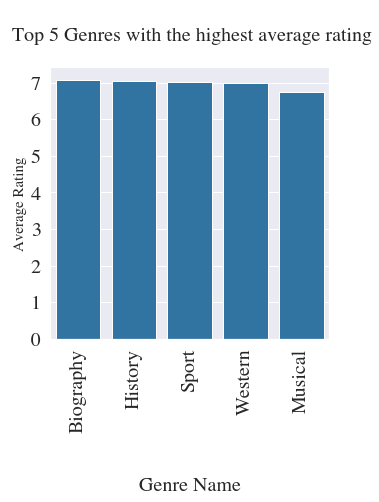

In [88]:
sns.set(rc={"figure.figsize":(5, 5)}, font = "Times") #width=10, height=10


title = "\n Top 5 Genres with the highest average rating\n"
sns.barplot(x = "genres", 
            y = "averagerating", 
            data = top_5, 
            color = "tab:blue").set_title(title,
                                         fontdict = { 'fontsize': 20})
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(rotation = 0, fontsize = 20)
plt.xlabel("\n\nGenre Name", fontsize = 20)
plt.ylabel("Average Rating", fontsize = 15)
# plt.title("\nTop 10 movies produced with the highest ratio\n", fontsize = 20)
plt.show()

### Genre-budget-d_gross-w_gross-year

In this part we want to find the total budget, domestic gross and worldwide gross of each genre.

In [91]:
# to_pick = ["genres","budget", "d_gross", "w_gross", "return_ratio","year"]
# data = df["title_genres_year_budgets_studio_rating"]

# df["Genre-budget-d_gross-w_gross-year"] = data[to_pick]
# # df["Genre-budget-d_gross-w_gross-year"].head()

#### Genre and Maximum Return Ratio

In this section, by using the following equation

\begin{equation}
\mathscr{R} = \frac{\sum (d + w - b)}{\sum b}
\end{equation}

in which $\mathscr{R}$, $d$, $w$, $b$ are return ration, domestic gross, worldwide gross and budget, respectively, we try to find top 5 genres with the highest return ratio. 

In [104]:
# data = df["Genre-budget-d_gross-w_gross-year"]
# genre_budget = data.groupby("genres")["budget", "d_gross", "w_gross"].mean()

In [293]:
# genre_budget["return_ratio"] = (genre_budget["d_gross"] 
#                          +genre_budget["w_gross"] 
#                          - genre_budget["budget"]) / (genre_budget["budget"])

In [294]:
# genre_budget.reset_index(inplace = True)

In [295]:
# top_5_genre_budget = genre_budget.sort_values("return_ratio", ascending=False).head(5)
# top_5_genre_budget

,genres,budget,d_gross,w_gross,return_ratio
12,Music,2.115161e+07,4.543177e+07,1.029974e+08,6.017392
11,Horror,2.186822e+07,4.163278e+07,9.414637e+07,5.208970
14,Mystery,2.797058e+07,4.915679e+07,1.142046e+08,4.840473
2,Animation,1.070671e+08,1.529010e+08,4.295770e+08,4.440309
16,Sci-Fi,1.018763e+08,1.392695e+08,3.834521e+08,4.130943


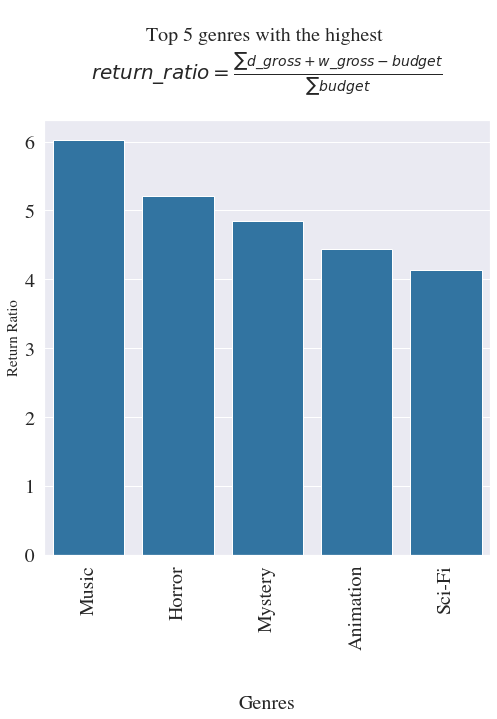

In [296]:
sns.set(rc={"figure.figsize":(8, 8)}, font = "Times") #width=10, height=10
d = top_5_genre_budget

title = r"$return\_ratio = \frac{\sum d\_gross + w\_gross - budget}{\sum budget}$"
sns.barplot(x = "genres", 
            y = "return_ratio", 
            data = d, 
            color = "tab:blue").set_title("\nTop 5 genres with the highest \n" +
                                          title + "\n",
                                         fontdict = { 'fontsize': 20})
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(rotation = 0, fontsize = 20)
plt.xlabel("\n\nGenres", fontsize = 20)
plt.ylabel("Return Ratio", fontsize = 15)
# plt.title("\nTop 10 movies produced with the highest ratio\n", fontsize = 20)
plt.show()

# Movies (DO NOT INCLUDE IN THE FINAL REPORT)

## Top 5 Movies with a Budget more than 10 millions

In this section, we want to find top 5 movies with the highest return ration with the minimum budget of 10 millions

In [ ]:
# h_budget = 10000000

# movie_high_budget_gorss = (df["title_genres_year_budgets_studio_rating"]
#                           ).loc[df["title_genres_year_budgets_studio_rating"]["budget"]
#                                 >h_budget]
# top_5 = movie_high_budget_gorss.sort_values("return_ratio", ascending=False).head(5)

In [ ]:
# sns.set(rc={"figure.figsize":(8, 8)}, font = "Times") #width=10, height=10


# title = "\nTop 5 movies produced with the highest return ratio\n"
# sns.barplot(x = "movie", 
#             y = "return_ratio", 
#             data = top_5, 
#             color = "tab:blue").set_title(title,
#                                          fontdict = { 'fontsize': 20})
# plt.xticks(rotation = 90, fontsize = 20)
# plt.yticks(rotation = 0, fontsize = 20)
# plt.xlabel("\n\nMovie Name", fontsize = 20)
# plt.ylabel(r"$Ratio = \frac{d\_gross + w\_gross - budget}{budget}$", fontsize = 15)
# # plt.title("\nTop 10 movies produced with the highest ratio\n", fontsize = 20)
# plt.show()

## Top 5 Movies with a minimum budget of 10 millions and highest average rating. 

In [ ]:
# h_budget = 10000000

# movie_high_budget_gorss = (df["title_genres_year_budgets_studio_rating"]
#                           ).loc[df["title_genres_year_budgets_studio_rating"]["budget"]
#                                 >h_budget]
# top_5 = movie_high_budget_gorss.sort_values("averagerating", ascending=False).head(5)

In [ ]:
# sns.set(rc={"figure.figsize":(8, 8)}, font = "Times") #width=10, height=10


# title = "\nTop 5 movies produced with the highest average rating with the minimum budget of 10 million\n"
# sns.barplot(x = "movie", 
#             y = "averagerating", 
#             data = top_5, 
#             color = "tab:blue").set_title(title,
#                                          fontdict = { 'fontsize': 20})
# plt.xticks(rotation = 90, fontsize = 20)
# plt.yticks(rotation = 0, fontsize = 20)
# plt.xlabel("\n\nMovie Name", fontsize = 20)
# plt.ylabel("Average Rating", fontsize = 15)
# # plt.title("\nTop 10 movies produced with the highest ratio\n", fontsize = 20)
# plt.show()

## Top 5 Movies with the highest average rating. 

In [ ]:

# movie_highest_rating = df["title_genres_year_budgets_studio_rating"]

# top_5 = movie_highest_rating.sort_values("averagerating", ascending=False).head(5)

In [ ]:
# sns.set(rc={"figure.figsize":(8, 8)}, font = "Times") #width=10, height=10


# title = "\nTop 5 movies produced with the highest average rating\n"
# sns.barplot(x = "movie", 
#             y = "averagerating", 
#             data = top_5, 
#             color = "tab:blue").set_title(title,
#                                          fontdict = { 'fontsize': 20})
# plt.xticks(rotation = 90, fontsize = 20)
# plt.yticks(rotation = 0, fontsize = 20)
# plt.xlabel("\n\nMovie Name", fontsize = 20)
# plt.ylabel("Average Rating", fontsize = 15)
# # plt.title("\nTop 10 movies produced with the highest ratio\n", fontsize = 20)
# plt.show()

# Studios

## Studios with the highest total gross 

In [110]:
movie_budget_gorss_studio = (
    df["title_genres_year_budgets_studio_rating"].groupby("studio")["return_ratio"].mean())

In [111]:
movie_budget_gorss_studio = movie_budget_gorss_studio.reset_index()

<AxesSubplot:ylabel='Frequency'>

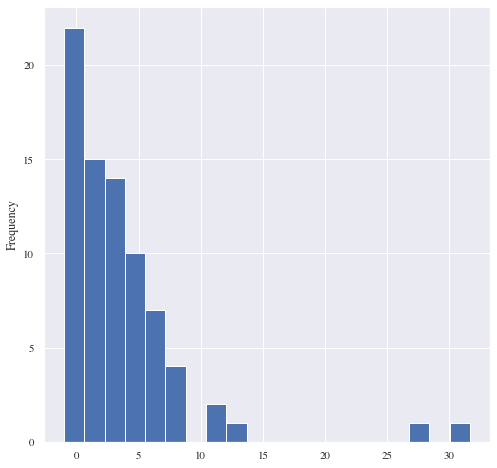

In [123]:
movie_budget_gorss_studio['return_ratio'].plot(kind='hist',
                                               bins = 20)

In [118]:
# movie_budget_gorss_studio.plot("return_ratio", kind = "hist", bins = 20)

# movie_budget_gorss_studio["cumulative_ratio"] = (movie_budget_gorss_studio["return"]
#                                      )/movie_budget_gorss_studio["budget"]

TypeError: no numeric data to plot

In [113]:
column = "return_ratio"
top10_total_ratio_studio = movie_budget_gorss_studio.sort_values(column, 
                                                                 ascending=False).head(10)

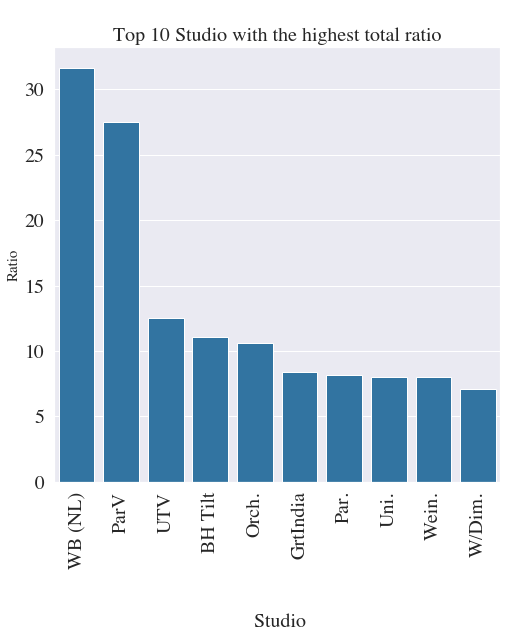

In [116]:
sns.set(rc={"figure.figsize":(8, 8)}, font = "Times") #width=10, height=10

sns.barplot(x = "studio", 
            y = "return_ratio", 
            data = top10_total_ratio_studio, 
            color = "tab:blue").set_title(
    "\nTop 10 Studio with the highest total ratio"
                                         ,fontdict = { 'fontsize': 20})
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(rotation = 0, fontsize = 20)
plt.xlabel("\n\n Studio", fontsize = 20)
plt.ylabel("Ratio", fontsize = 15)
# plt.title("\nTop 10 movies produced with the highest ratio\n", fontsize = 20)
plt.show()

## **Studio, who made more movies since $2010$ (DO NOT INCLUDE IN THE FINAL REPORT)**

In [154]:
# movie_budget_gorss_studio_year = (df["title_genres_year_budgets_studio_rating"]
#                                  )[df["title_genres_year_budgets_studio_rating"]["year"] >= 2010]

In [155]:
# movie_budget_gorss_studio_year_movie = (movie_budget_gorss_studio_year
#                                        ).groupby("studio").movie.count()

In [156]:
# top10_movie_made = movie_budget_gorss_studio_year_movie.sort_values(ascending=False).head(10)
# top10_movie_made_df = top10_movie_made.to_frame()
# top10_movie_made_df.reset_index(inplace = True)

In [304]:
# sns.set(rc={"figure.figsize":(10, 10)}, font = "Times") #width=10, height=10



# sns.barplot(x = "studio", 
#             y = "movie", 
#             data = top10_movie_made_df, 
#             color = "tab:blue").set_title(
#     "\nTop 10 Studio that made the highest number of movies since 2010"                            
#                                          ,fontdict = { 'fontsize': 20})
# plt.xticks(rotation = 90, fontsize = 20)
# plt.yticks(rotation = 0, fontsize = 20)
# plt.xlabel("\n\nStudio", fontsize = 20)
# plt.ylabel("Total Number of Movies made since 2010", fontsize = 15)

# plt.show()

## Studio with the highest average rating

In [305]:
data = df["title_genres_year_budgets_studio_rating"]
studio_rating = data.groupby("studio")[["budget", "averagerating"]].mean()
studio_rating.reset_index(inplace = True)
top5_studio_rating = studio_rating.sort_values("averagerating", ascending=False).head(5)

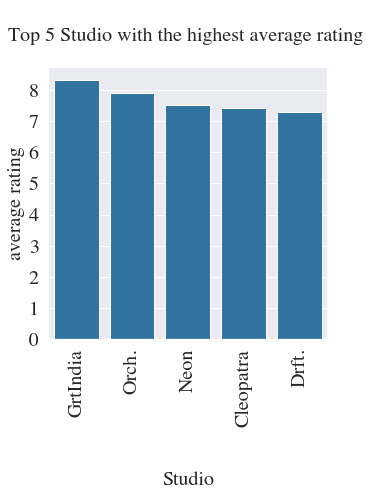

In [306]:
sns.set(rc={"figure.figsize":(5, 5)}, font = "Times") #width=10, height=10



sns.barplot(x = "studio", 
            y = "averagerating", 
            data = top5_studio_rating, 
            color = "tab:blue").set_title(
    "\nTop 5 Studio with the highest average rating \n"                            
                                         ,fontdict = { 'fontsize': 20})
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(rotation = 0, fontsize = 20)
plt.xlabel("\n\nStudio", fontsize = 20)
plt.ylabel("average rating", fontsize = 20)

plt.show()

# Directors

## Directors with a highest Average Rating

In this section, we try to pick top 5 directors with the highest average rating. It is important to consider the directors who are still alive. So, we will use the dataframe called `alive_people` and will merge it with `imdb_title_crew_gz` to get their name.

In [307]:
dict1 = df["alive_people"]
dict2 = df["imdb_title_crew_gz"]
left_l = ["nconst"]
right_l =["directors"]

df["alive_director_movie_id"] = dict1.merge(dict2, 
                                      left_on = left_l, 
                                      right_on = right_l
                                     )
to_drop = ["primary_profession", "known_for_titles", 
           "birth_year", "death_year", "directors", "writers"]
df["alive_director_movie_id"] = df["alive_director_movie_id"].drop(columns = 
                                                                   to_drop, 
                                                                   axis= 1)

df["alive_director_movie_id"].drop_duplicates(inplace = True)
df["alive_director_movie_id"].head()

,nconst,primary_name,tconst
0,nm0062879,Ruel S. Bayani,tt1592569
1,nm0062879,Ruel S. Bayani,tt8421806
2,nm0062879,Ruel S. Bayani,tt2057445
3,nm0062879,Ruel S. Bayani,tt2590280
4,nm0064023,Bryan Beasley,tt4512140


Now we want to merge this newly made dataframe with `title_genres_year_budgets_studio` to have a dataframe for alive directors and the budgets:

In [308]:
dict1 = df["title_genres_year_budgets_studio"]
dict2 = df["alive_director_movie_id"]
left_l = ["tconst"]
right_l =["tconst"]
dict2.head()
df["alive_director_budget_genres"] = dict1.merge(dict2, 
                                      left_on = left_l, 
                                      right_on = right_l
                                     )
to_rename = {"primary_name":"director"}
df["alive_director_budget_genres"].rename(columns = to_rename, inplace = True)
df["alive_director_budget_genres"].drop_duplicates(inplace = True)
# df["alive_director_budget_genres"].head()

By merging dataframe `alive_director_budget_genres` with `imdb_title_ratings_gz`, we can find the average rating of each director

In [309]:
dict1 = df["alive_director_budget_genres"]
dict2 = df["imdb_title_ratings_gz"]
left_l = ["tconst"]
right_l =["tconst"]
dict2.head()

df["alive_director_budget_genres_rating"] = dict1.merge(dict2, 
                                      left_on = left_l, 
                                      right_on = right_l
                                     )

df["alive_director_budget_genres_rating"].drop_duplicates(inplace = True)
df["alive_director_budget_genres_rating"].head()

,id,movie,budget,d_gross,w_gross,i_ratio,return,return_ratio,year,tconst,genres,studio,nconst,director,averagerating,numvotes
0,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,3.133774,8.761278e+08,2.133774,2011,tt1298650,"Action,Adventure,Fantasy",BV,nm0551128,Rob Marshall,6.6,447624
1,4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5.632244,1.531420e+09,4.632244,2015,tt2395427,"Action,Adventure,Sci-Fi",BV,nm0923736,Joss Whedon,7.3,665594
2,7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,9.089832,2.426950e+09,8.089832,2018,tt4154756,"Action,Adventure,Sci-Fi",BV,nm0751648,Joe Russo,8.5,670926
3,7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,9.089832,2.426950e+09,8.089832,2018,tt4154756,"Action,Adventure,Sci-Fi",BV,nm0751577,Anthony Russo,8.5,670926
4,9,Justice League,300000000.0,229024295.0,6.559452e+08,2.949898,5.849695e+08,1.949898,2017,tt0974015,"Action,Adventure,Fantasy",WB,nm0811583,Zack Snyder,6.5,329135


In [310]:
df["alive_director_budget_genres_rating"]["genres"] = (
    df["alive_director_budget_genres_rating"]["genres"].apply(prep_expand)
)

In [311]:
df["alive_director_budget_genres_rating"] = df["alive_director_budget_genres_rating"].explode("genres")

Here we would like to find top 5 directors with the highest average rating:

In [312]:
data = df["alive_director_budget_genres_rating"]
directors_ave_rating = data.groupby("director")["averagerating", "numvotes"].mean()


directors_ave_rating.reset_index(inplace = True)

top_5_directors = directors_ave_rating.sort_values("averagerating", ascending=False).head()
top_5_directors

<ipython-input-312-642cb32e33c7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  directors_ave_rating = data.groupby("director")["averagerating", "numvotes"].mean()


,director,averagerating,numvotes
520,Nitesh Tiwari,8.500000,1.236380e+05
129,Christopher Nolan,8.427273,1.236043e+06
6,Adrian Molina,8.400000,2.771940e+05
423,Lee Unkrich,8.350000,4.797060e+05
105,Charles Ferguson,8.300000,6.530400e+04


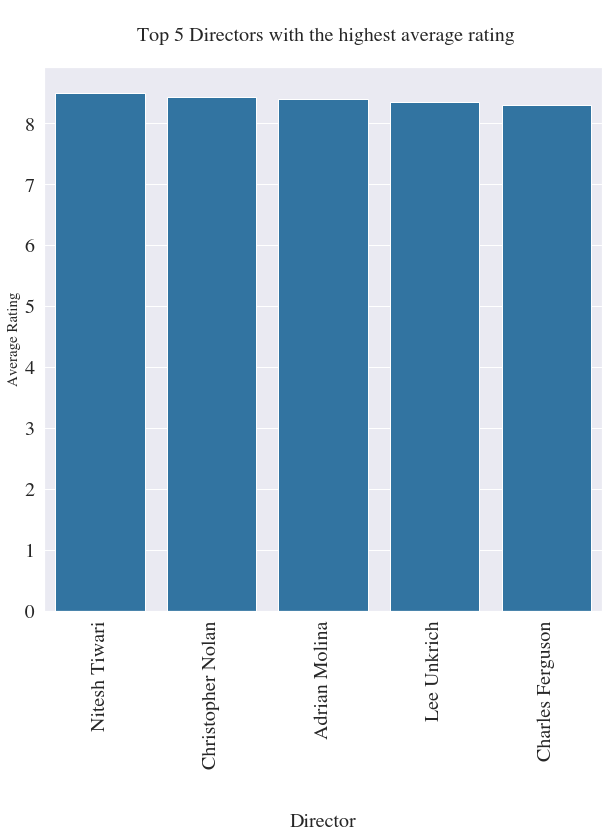

In [166]:
sns.set(rc={"figure.figsize":(10, 10)}, font = "Times") #width=10, height=10


title = "\n Top 5 Directors with the highest average rating\n"
sns.barplot(x = "director", 
            y = "averagerating", 
            data = top_5_directors, 
            color = "tab:blue").set_title(title,
                                         fontdict = { 'fontsize': 20})
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(rotation = 0, fontsize = 20)
plt.xlabel("\n\nDirector", fontsize = 20)
plt.ylabel("Average Rating", fontsize = 15)

plt.show()

## Director and Genre (DO NOT INCLUDE THIS IN THE FINAL REPORT)

In [314]:
# director_genre = df["alive_director_budget_genres_rating"]
# director_genre_count = director_rating.groupby(["director", "genres"])[["movie"]].count()
# director_genre_count.reset_index(inplace = True)
# director_genre_count
# top5_director_genre_count = director_genre_count.sort_values("movie", 
#                                                              ascending = False).head(5)
# top5_director_genre_count

In [315]:
# sns.set(rc={"figure.figsize":(8, 8)}, font = "Times") #width=10, height=10


# title = "\n Top 5 Directors with the highest number of movies in \n"
# sns.barplot(x = "director", 
#             y = "genres", 
#             data = top5_director_genre_count, 
#             color = "tab:blue").set_title(title,
#                                          fontdict = { 'fontsize': 20})
# plt.xticks(rotation = 90, fontsize = 20)
# plt.yticks(rotation = 0, fontsize = 20)
# plt.xlabel("\n\nDirector", fontsize = 20)
# plt.ylabel("Average Rating", fontsize = 15)
# # plt.title("\nTop 10 movies produced with the highest ratio\n", fontsize = 20)
# plt.show()

# Budget-Year (DO NOT INCLUDE THIS IN THE FINAL REPORT)

In [318]:
# data = df["all_director_budget_genres_rating"]
# data.head()
# budget_year = data.groupby("year")["budget", "return", "return_ratio"].sum()
# budget_year.reset_index(inplace = True)
# budget_year.head()

In [317]:
# data = budget_year[["budget", "year"]]

# sns.set(rc={"figure.figsize":(10, 10)}, font = "Times") #width=10, height=10


# title = "\n Total budget in each year\n"
# sns.barplot(x = "year", 
#             y = "budget", 
#             data = data, 
#             color = "tab:blue").set_title(title,
#                                          fontdict = { 'fontsize': 20})
# plt.xticks(rotation = 90, fontsize = 20)
# plt.yticks(rotation = 0, fontsize = 20)
# plt.xlabel("\n Year", fontsize = 20)
# plt.ylabel("Total Budget", fontsize = 15)
# # plt.title("\nTop 10 movies produced with the highest ratio\n", fontsize = 20)
# plt.show()